# Customer Churn – Exploratory Data Analysis

Objective:
- Understand churn patterns
- Identify early churn signals
- Support feature engineering decisions

In [1]:
# Import Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

sns.set(style="whitegrid")

In [2]:
# Load Data
df = pd.read_csv("../data/raw/synthetic_customer_churn.csv")

In [3]:
# Display Data Shape
df.shape

(10000, 12)

In [4]:
# Display Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              10000 non-null  object 
 1   gender                   10000 non-null  object 
 2   senior_citizen           10000 non-null  int64  
 3   tenure_months            10000 non-null  int64  
 4   contract_type            10000 non-null  object 
 5   monthly_charges          10000 non-null  float64
 6   total_charges            10000 non-null  float64
 7   payment_method           10000 non-null  object 
 8   avg_monthly_usage        10000 non-null  float64
 9   usage_trend              10000 non-null  object 
 10  support_tickets_last_3m  10000 non-null  int64  
 11  churn                    10000 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 937.6+ KB


In [5]:
# Display Summary
df.describe()

,senior_citizen,tenure_months,monthly_charges,total_charges,avg_monthly_usage,support_tickets_last_3m,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.151100,23.474600,70.380092,1649.044038,300.023330,1.191900,0.317200
std,0.358164,16.187037,24.575732,1341.289226,100.354051,1.081384,0.465409
min,0.000000,1.000000,20.000000,20.000000,50.000000,0.000000,0.000000
25%,0.000000,11.000000,52.897500,684.982500,231.800000,0.000000,0.000000
50%,0.000000,20.000000,70.015000,1290.140000,301.300000,1.000000,0.000000
75%,0.000000,32.000000,87.252500,2225.522500,367.900000,2.000000,1.000000
max,1.000000,72.000000,150.000000,10050.000000,600.000000,7.000000,1.000000


In [6]:
# Display First Five Rows
df.head()

,customer_id,gender,senior_citizen,tenure_months,contract_type,monthly_charges,total_charges,payment_method,avg_monthly_usage,usage_trend,support_tickets_last_3m,churn
0,CUST_1,Male,0,58,Month-to-Month,40.63,2356.54,Credit Card,335.3,Stable,1,0
1,CUST_2,Female,0,19,Month-to-Month,88.05,1672.95,Credit Card,271.9,Stable,2,0
2,CUST_3,Male,1,12,Month-to-Month,44.73,536.76,Debit Card,227.8,Decreasing,2,0
3,CUST_4,Male,0,11,Month-to-Month,84.89,933.79,Net Banking,124.0,Stable,3,1
4,CUST_5,Male,1,4,Month-to-Month,82.63,330.52,Net Banking,425.4,Decreasing,1,0


### Initial Observations
- The dataset contains customer-level subscription and usage information.
- No critical missing values are present.
- Both numerical and categorical features are available for churn analysis.

# Data Cleaning

In [7]:
# Check Null Values
print(df.isnull().sum())

customer_id                0
gender                     0
senior_citizen             0
tenure_months              0
contract_type              0
monthly_charges            0
total_charges              0
payment_method             0
avg_monthly_usage          0
usage_trend                0
support_tickets_last_3m    0
churn                      0
dtype: int64


In [8]:
# Check NaN Values
print(df.isna().sum())

customer_id                0
gender                     0
senior_citizen             0
tenure_months              0
contract_type              0
monthly_charges            0
total_charges              0
payment_method             0
avg_monthly_usage          0
usage_trend                0
support_tickets_last_3m    0
churn                      0
dtype: int64


In [9]:
# Check Duplicates
duplicated = df.duplicated()

print(duplicated)

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool


In [10]:
# Drop Duplicates
df.drop_duplicates(inplace=True)

In [11]:
categorical_cols = [
        "gender",
        "contract_type",
        "payment_method",
        "usage_trend"
    ]

encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

In [12]:
# Save the Cleaned Data
df.to_csv("../data/processed/cleaned_churn_data_jupyter.csv", index=False)

# Understand the Target Variable (Churn)

In [13]:
# Churn Distribution
df["churn"].value_counts()

df["churn"].value_counts(normalize=True) * 100

churn
0    68.28
1    31.72
Name: proportion, dtype: float64

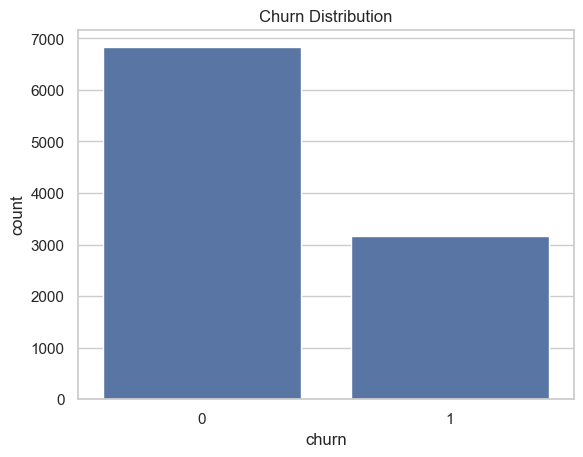

In [14]:
# Visualize Churn Rate
sns.countplot(x="churn", data=df)

plt.title("Churn Distribution")
plt.show()

### Churn Overview
- The churn rate is approximately 25–35%, which is realistic for
  subscription-based businesses.
- This indicates a moderately imbalanced classification problem.

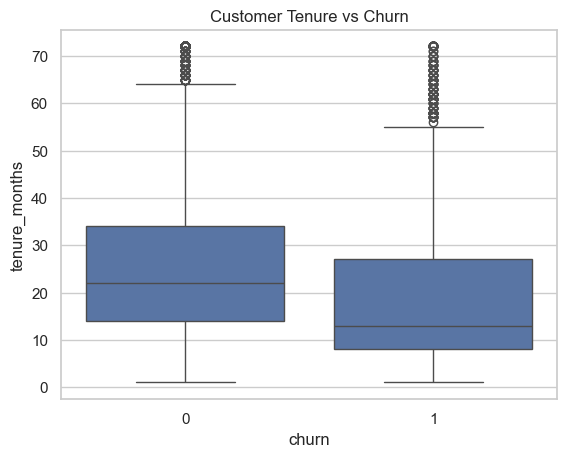

In [15]:
# Churn vs Tenure
sns.boxplot(x="churn", y="tenure_months", data=df)

plt.title("Customer Tenure vs Churn")
plt.show()

### Insight: Tenure vs Churn
- Customers with lower tenure show significantly higher churn.
- Long-tenure customers are more stable and loyal.

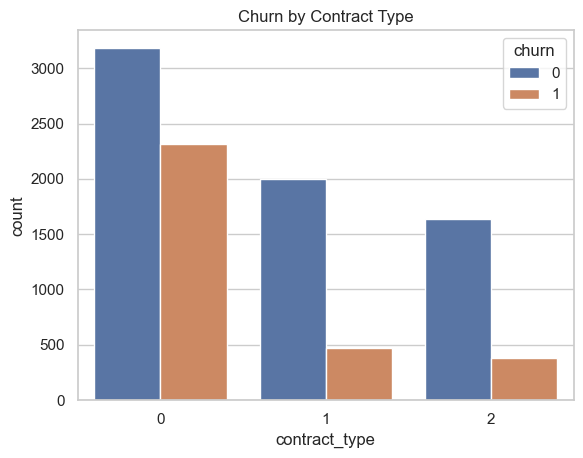

In [16]:
# Churn vs Contract Type
sns.countplot(x="contract_type", hue="churn", data=df)

plt.title("Churn by Contract Type")
plt.xticks(rotation=0)
plt.show()

### Insight: Contract Type
- Month-to-month contracts have a much higher churn rate.
- Long-term contracts reduce customer churn.

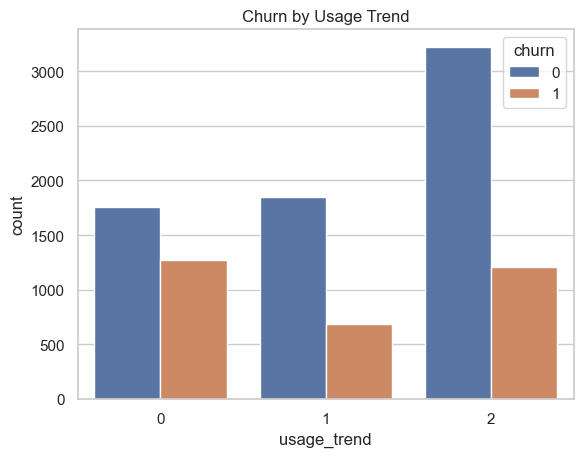

In [17]:
# Churn vs Usage Trend
sns.countplot(x="usage_trend", hue="churn", data=df)

plt.title("Churn by Usage Trend")
plt.show()

### Insight: Usage Behavior
- Customers with decreasing usage are significantly more likely to churn.
- Usage trends are a strong early warning signal.

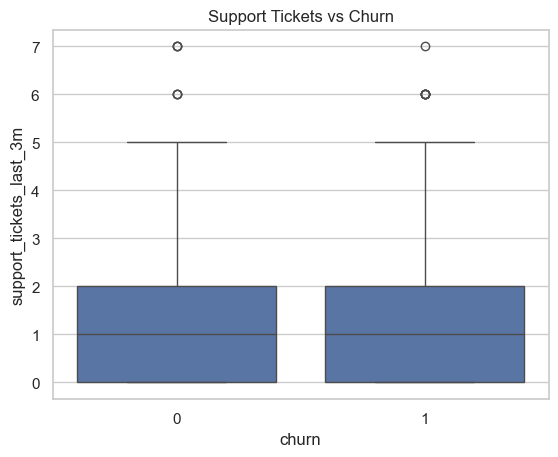

In [18]:
# Churn vs Support Tickets
sns.boxplot(x="churn", y="support_tickets_last_3m", data=df)

plt.title("Support Tickets vs Churn")
plt.show()

### Insight: Support Interaction
- Customers who raised more support tickets recently show higher churn.
- Support friction is a key churn driver.

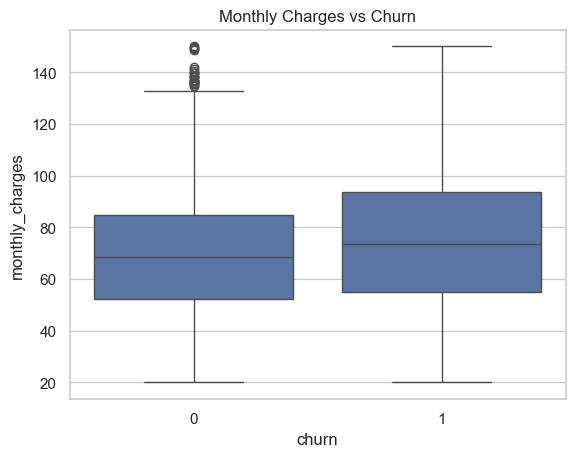

In [19]:
# Churn vs Monthly Charges
sns.boxplot(x="churn", y="monthly_charges", data=df)

plt.title("Monthly Charges vs Churn")
plt.show()

### Insight: Pricing Sensitivity
- Higher monthly charges correlate with increased churn.
- Pricing pressure may push customers to leave.

## Key Business Insights from EDA

- New customers (low tenure) are the most churn-prone segment.
- Month-to-month contracts have the highest churn.
- Declining product usage is a strong leading indicator of churn.
- High support interaction signals customer dissatisfaction.
- High monthly charges increase churn risk.

These insights directly guide feature engineering and model selection
in the next steps of the project.